In [1]:
import numpy as np
import cv2
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.image import imread

from sklearn.model_selection  import train_test_split
from sklearn.neural_network import MLPClassifier
from assets import *

In [2]:
arabic_alpha = np.array([u'\u0627',u'\u0628',u'\u062A',u'\u062B',u'\u062C',u'\u062D',u'\u062E',u'\u062F',u'\u0630',u'\u0631',u'\u0632',u'\u0633',u'\u0634',u'\u0635',u'\u0636',u'\u0637',u'\u0638',u'\u0639',u'\u063A',u'\u0641',u'\u0642',u'\u0643',u'\u0644',u'\u0645',u'\u0646',u'\u0647',u'\u0648',u'\u064A',u'\u0644'+ u'\u0627'])
arabic_alpha

array(['ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش',
       'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه',
       'و', 'ي', 'لا'], dtype='<U2')

In [3]:
X = []
Y = []
for char in arabic_alpha:
    char_paths =  glob(f'Dataset/char_sample/{char}/*.png')

    for char_path in char_paths[:4000]:
        img = imread(char_path)
        _,thresh = cv2.threshold(img,127/255,1,cv2.THRESH_BINARY)
        char_box = bound_box(thresh)
        resized = cv2.resize(char_box,(25,25), interpolation = cv2.INTER_AREA)
        X.append(resized.flatten())
        Y.append(char)

In [4]:
len(X)

116000

In [5]:
assert(len(X) == len(Y))

In [6]:
X_train = []
Y_train = []
X_test = []
Y_test = []

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8,shuffle=True)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [7]:
clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(200, 100,), max_iter=1000)
clf.fit(X_train, Y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(200, 100), max_iter=1000)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
print(f'Accuracy:{(y_pred == Y_test).mean():3f}')

Accuracy:0.996466


In [10]:
img = cv2.imread('Dataset/test/text.png')

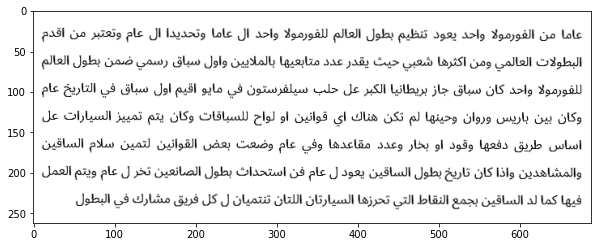

In [11]:
plt.figure(figsize=(10,14))
plt.imshow(img,'gray',vmin=0,vmax=1)
plt.show()

In [12]:
txt = ''
lines = get_lines(img)
for line in lines:
    words = get_words(line)
    for word in words:
        txt += ' '
        chars = get_chars(line, word)
        for char in chars:
            _,thresh = cv2.threshold(char,127,255,cv2.THRESH_BINARY)
            char_box = bound_box(thresh//255)
            resized = cv2.resize(char_box,(25,25), interpolation = cv2.INTER_AREA)
            txt += clf.predict([resized.flatten()])[0]


In [13]:
txt

' عاما من الفورمولا واحد يعود تنظيم بطول العالم للفورمولا واحد ال ثداما وتحديدا ال عام وتعتبر من اقدم البطولات العالب ومن اكثرها شعبي حيث يقدر عدد متابعيها بالملايين واول سباق رلم ضمن بطول العالم للفورمولا واحد كان سباق جاز بريطانيا الكبر عل حلب سيلفرستون في مايو اقيم اول سباق في التاريخ عام وكان بين باريس وروان وحينها لم تكن هناك اي قوانين او لواح لللساقات وكان يتم تمييز اللسارات ذلل اسامل طريق دفعها وقود او بخار وعدد مقاعدها وفي عام وضعت بعضل القوانين لتمين سلام اللخقين والمرشاهدين واذا كان تاريخ بطول الرمقين يعود ل عام فن استحداث بطول الصانعين تخر ل عام ويتم العمل فيها كما ل الساقين بجمع النقاط التي تحرزها السيارتان اللتان تنتميان ل كل فريقا مشارك في البطول'